In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
import tensorflow.keras.backend as ktf
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.preprocessing import image

from location.network import *
from location.losses import *
from recognition.network import *

from util import *
import cfg


In [8]:
cvimg= cv2.imread(img_path)

In [9]:
cvimg.shape

(512, 512, 3)

In [10]:
img = cv2.resize(cvimg,(400, 400))

In [11]:
img.shape

(400, 400, 3)

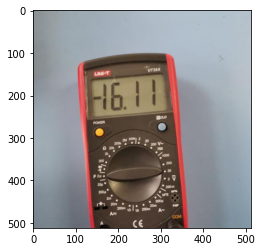

In [26]:
img_path="demo/300.jpg"
img = image.load_img(img_path)
d_wight, d_height = resize_image(img, cfg.image_size)
plt.imshow(img)

In [ ]:
image.img_to_array(img)
image.random_brightness(img,brightness_range=(0.8,0.8))
plt.imshow(img)

In [ ]:
#img = img.resize((d_wight, d_height), Image.NEAREST).convert('RGB')
img = image.img_to_array(img)
#img = img/255*2-1
preprocess_input(img,mode='tf')
#plt.imshow(image.array_to_img(img))
#image.random_brightness(img,brightness_range=(0.5,0.9))
plt.imshow(img)
plt.imshow(image.array_to_img(img))
#image.img_to_array(img)


In [ ]:
plt.imshow(image.array_to_img(img))

In [4]:
location_model = Location().location_network()
location_model.load_weights(cfg.location_weights)
#location_model.summary()

In [6]:
_, recognition_model = CRNN(cfg.height,cfg.width,  cfg.label_len, cfg.characters).network()
recognition_model.load_weights(cfg.recognition_weights)
#recognition_model.summary()

## 单图测试

1
-1


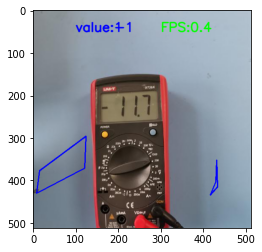

In [27]:
img_path = r'location\test_imgs\422.jpg'
image = cv2.imread(img_path)
image = loc_and_rec(location_model, recognition_model, image)
plt.imshow(image[:,:,::-1])

In [8]:
%%time
img_path = 'demo/300.jpg'
img = image.load_img(img_path,target_size=(512,512))
print(type(img))
plt.figure(figsize=(15,20))
plt.subplot(1,3,1)
plt.xlabel('input')
plt.imshow(img)
ims_re = location(location_model, img_path,cfg.pixel_threshold)
if(len(ims_re)>0):
    #print(len(ims_re))
    plt.subplot(1,3,2)
    plt.imshow(ims_re[0])
    re_text = recognition(recognition_model, ims_re[0])
    result = img_path + " " + re_text + "\n"
    print('recognize result: '+ re_text)
        

<class 'PIL.JpegImagePlugin.JpegImageFile'>


AttributeError: 'Image' object has no attribute 'shape'

In [6]:
img_path = 'demo/300.jpg'
img = image.load_img(img_path,target_size=(512,512))


In [9]:
img.size[0]

512

## 检测计时

In [ ]:
%%time
img_path = 'demo/046.jpg'
img = image.load_img(img_path,target_size=(512,512))
plt.figure(figsize=(15,20))
plt.subplot(1,3,1)
plt.xlabel('input')
plt.imshow(img)
ims_re = location(location_model, img_path,cfg.pixel_threshold)
if(len(ims_re)>0):
    #print(len(ims_re))
    plt.subplot(1,3,2)
    plt.imshow(ims_re[0])

## 识别计时

In [ ]:
%%time
re_text = recognition(recognition_model, ims_re[0])
result = img_path + " " + re_text + "\n"
print(result)